In [2]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
image1 = cv2.imread('C:/Users/ADMIN/Pictures/photo/cat_1.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('C:/Users/ADMIN/Pictures/photo/cat_1.jpg',cv2.IMREAD_COLOR)


(3024, 4032)

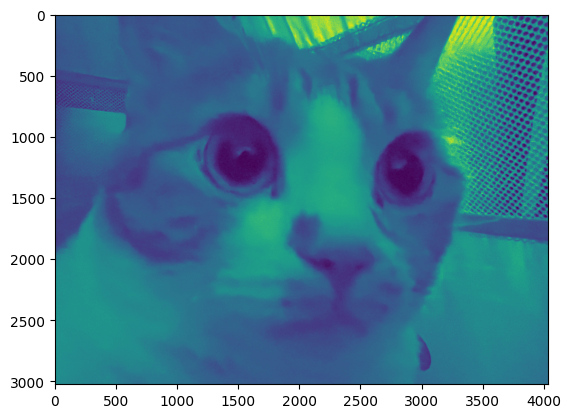

In [11]:
plt.imshow(image1)
image1.shape

(3024, 4032, 3)

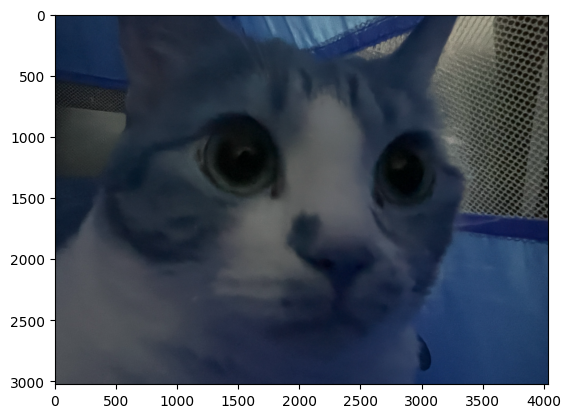

In [26]:
plt.imshow(image2)
image2.shape

In [26]:
image1_re=cv2.resize(image1,(1280,1280))
image1_re.shape

(1280, 1280)

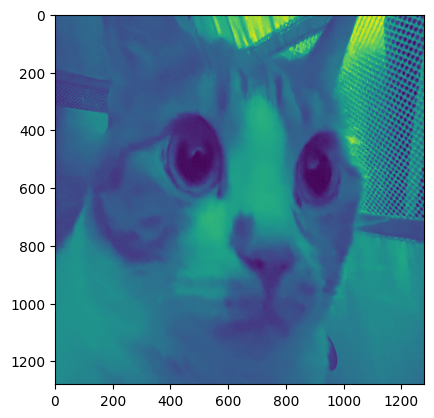

In [27]:
plt.imshow(image1_re)

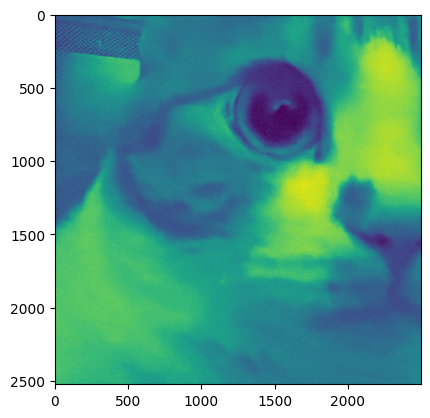

In [ ]:
image1_rev=image1[500:,0:2500]
plt.imshow(image1_rev)

In [31]:
def yolo_preprocessing(image, target_size=640, pad_color=(114, 114, 114)):
    h, w = image.shape[:2]
    scale = target_size / max(h, w)

    # 이미지 리사이즈 
    resized_img = cv2.resize(image, (int(w * scale), int(h * scale)))

    # 패딩 계산
    new_h, new_w = resized_img.shape[:2]
    pad_top = (target_size - new_h) // 2
    pad_bottom = (target_size - new_h) // 2
    pad_left = (target_size - new_w) // 2
    pad_right = (target_size - new_w) // 2

    # 비율 유지한 이미지 만들기
    pedding_img = cv2.copyMakeBorder(resized_img, pad_top, pad_bottom, pad_left, pad_right, 
                                    borderType=cv2.BORDER_CONSTANT, value=pad_color)
    

    return pedding_img

(640, 640, 3)

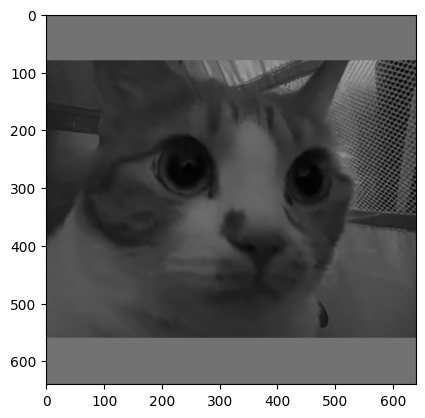

In [41]:
yolo_img1 = yolo_preprocessing(image1, target_size=640)
normalized_img = yolo_img1.astype(np.float32) / 255.0
preprocessing_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)
plt.imshow(preprocessing_img)
preprocessing_img.shape

(640, 640, 3)

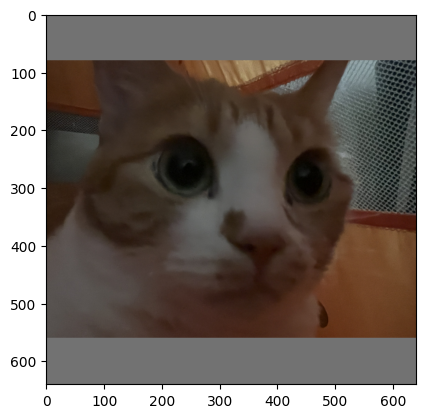

In [48]:
yolo_img2 = yolo_preprocessing(image2, target_size=640)
normalized_img = yolo_img2.astype(np.float32) / 255.0
preprocessing_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)
plt.imshow(preprocessing_img)
preprocessing_img.shape

In [38]:
def augment_image(img):
    augmented_images = []
    
    # 원본 이미지 추가
    augmented_images.append(img)
    
    # 1. 이미지 회전 
    angle = np.random.randint(-30, 30)  
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    rotated = cv2.warpAffine(img, M, (w,h))
    augmented_images.append(rotated)
    
    # 2. 이미지 좌우 반전 
    flipped_hor = cv2.flip(img, 1)
    augmented_images.append(flipped_hor)
    
    # 3. 이미지 상하 반전 
    flipped_ver = cv2.flip(img, 0)
    augmented_images.append(flipped_ver)
    
    # 4. 밝기 조정 
    brightness = np.random.randint(-50, 50)
    bright_img = cv2.convertScaleAbs(img, alpha=1, beta=brightness)
    augmented_images.append(bright_img)
    
    # 5. 가우시안 노이즈 추가 
    noise = np.random.normal(0, 15, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)
    augmented_images.append(noisy_img)
    
    return augmented_images


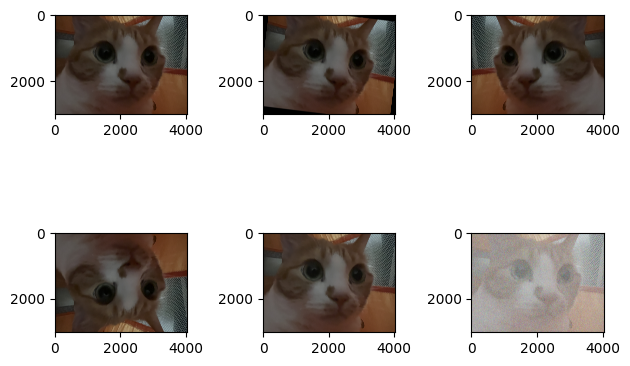

In [49]:
augmented_imgs = augment_image(image2)

for i, img in enumerate(augmented_imgs):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   

plt.tight_layout()
plt.show()